In [65]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
from matplotlib.dates import WeekdayLocator, DateFormatter


In [52]:
df_btc = pd.read_csv('data/market_data_btc_usdt_1d.csv',  low_memory=False)
df_btc_1w = pd.read_csv('data/market_data_btc_usdt_1w.csv',  low_memory=False)

df_eth = pd.read_csv('data/market_data_eth_usdt_1d.csv',  low_memory=False)

df_btc.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1514851200000,13382.16,15473.49,12890.02,14675.11,20078.092111,1514937599999,2.797171e+08,177728,11346.326739,1.580801e+08,0
1,1514937600000,14690.00,15307.56,14150.00,14919.51,15905.667639,1515023999999,2.361169e+08,162787,8994.953566,1.335873e+08,0
2,1515024000000,14919.51,15280.00,13918.04,15059.54,21329.649574,1515110399999,3.127816e+08,170310,12680.812951,1.861168e+08,0
3,1515110400000,15059.56,17176.24,14600.00,16960.39,23251.491125,1515196799999,3.693220e+08,192969,13346.622293,2.118299e+08,0
4,1515196800000,16960.39,17143.13,16011.21,17069.79,18571.457508,1515283199999,3.092169e+08,158242,11007.164056,1.834178e+08,0


In [53]:
df_btc.rename(columns={'Open time': 'OpenTime', 'Close time': 'CloseTime', 'Quote asset volume': 'QuoteAssetVolume', 'Number of trades':'NumberOfTrades', 'Taker buy base asset volume':'TakerBuyBaseAssetVolume','Taker buy quote asset volume': 'TakerBuyQuoteAssetVolume'  }, inplace=True)
df_btc = df_btc.drop(['Ignore', 'TakerBuyQuoteAssetVolume', 'QuoteAssetVolume','CloseTime'], axis=1)
df_eth.rename(columns={'Open time': 'OpenTime', 'Close time': 'CloseTime', 'Quote asset volume': 'QuoteAssetVolume', 'Number of trades':'NumberOfTrades', 'Taker buy base asset volume':'TakerBuyBaseAssetVolume','Taker buy quote asset volume': 'TakerBuyQuoteAssetVolume'  }, inplace=True)
df_eth = df_eth.drop(['Ignore', 'TakerBuyQuoteAssetVolume', 'QuoteAssetVolume','CloseTime'], axis=1)
df_btc.tail()
df_btc_1w.rename(columns={'Open time': 'OpenTime', 'Close time': 'CloseTime', 'Quote asset volume': 'QuoteAssetVolume', 'Number of trades':'NumberOfTrades', 'Taker buy base asset volume':'TakerBuyBaseAssetVolume','Taker buy quote asset volume': 'TakerBuyQuoteAssetVolume'  }, inplace=True)
df_btc_1w = df_btc_1w.drop(['Ignore', 'TakerBuyQuoteAssetVolume', 'QuoteAssetVolume','CloseTime'], axis=1)

In [58]:
df_btc['date'] = pd.to_datetime(df_btc['OpenTime'],unit='ms')
df_eth['date'] = pd.to_datetime(df_eth['OpenTime'],unit='ms')
df_btc_1w['date'] = pd.to_datetime(df_btc_1w['OpenTime'],unit='ms')



In [59]:
df_btc.set_index('date', inplace=True, drop=True)
df_eth.set_index('date', inplace=True, drop=True)
df_btc_1w.set_index('date', inplace=True, drop=True)


In [60]:
df_btc = df_btc.drop(['OpenTime'], axis=1)
df_eth = df_eth.drop(['OpenTime'], axis=1)
df_btc_1w = df_btc_1w.drop(['OpenTime'], axis=1)


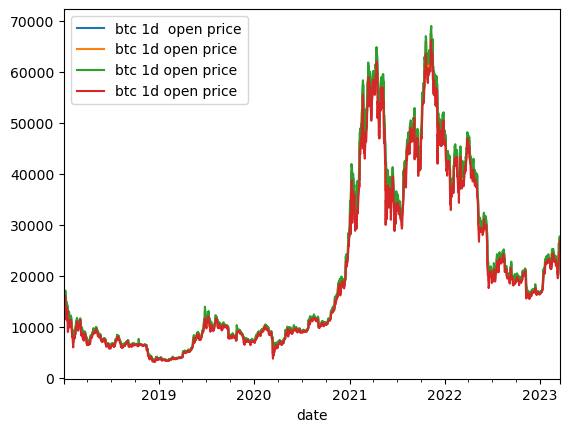

In [7]:
df_btc['Open'].plot(label = "btc 1d  open price")
df_btc['Close'].plot(label = "btc 1d open price")
df_btc['High'].plot(label = "btc 1d open price")
df_btc['Low'].plot(label = "btc 1d open price")
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

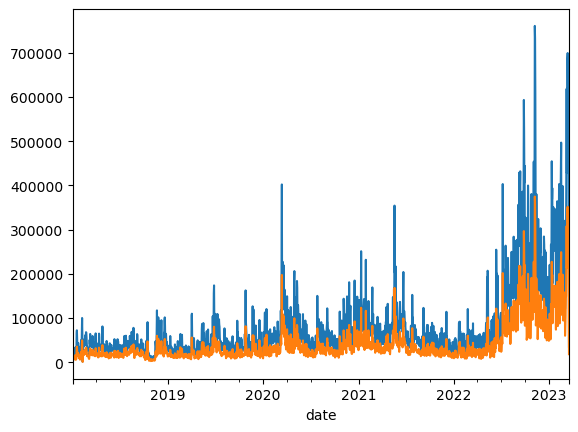

In [8]:
#volume analysis
df_btc["Volume"].plot(label="total volume")
df_btc["TakerBuyBaseAssetVolume"].plot(label="number of trades")

In [55]:
df_btc['return'] = (df_btc['Close']/df_btc['Close'].shift()) -1
df_eth['return'] = (df_eth['Close']/df_eth['Close'].shift()) -1
df_btc_1w['return'] = (df_btc_1w['Close']/df_btc_1w['Close'].shift()) -1



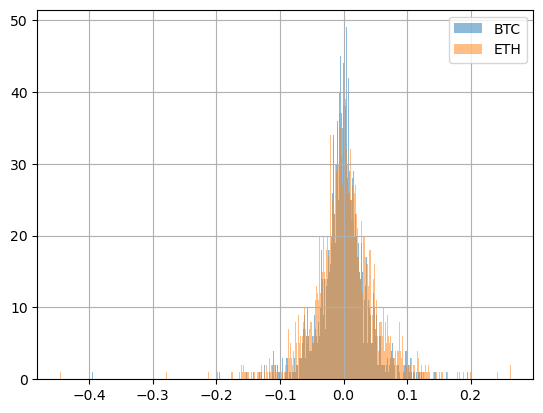

In [10]:
df_btc['return'].hist(bins=500, label="BTC", alpha=0.5)
df_eth['return'].hist(bins=500, label="ETH", alpha=0.5)
plt.legend()

In [11]:
df_btc['return'] =  df_btc['return'] * 100
df_btc['return'].describe()

count    1902.000000
mean        0.109306
std         3.882689
min       -39.504847
25%        -1.557475
50%         0.081092
75%         1.779692
max        19.536139
Name: return, dtype: float64

<AxesSubplot:>

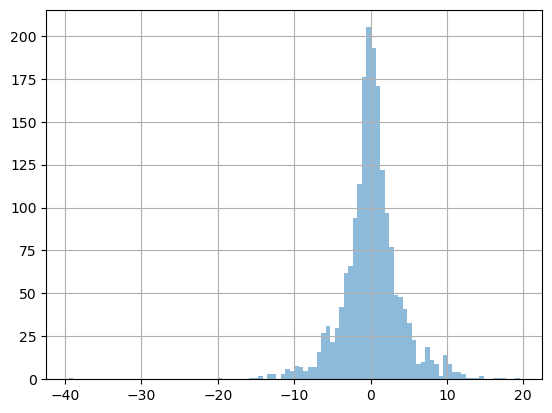

In [12]:
df_btc['return'].hist(bins=100, label="BTC", alpha=0.5)


<AxesSubplot:>

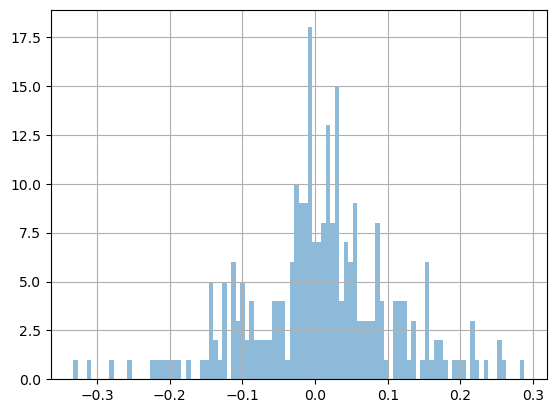

In [56]:
df_btc_1w['return'].hist(bins=100, label="BTC", alpha=0.5)


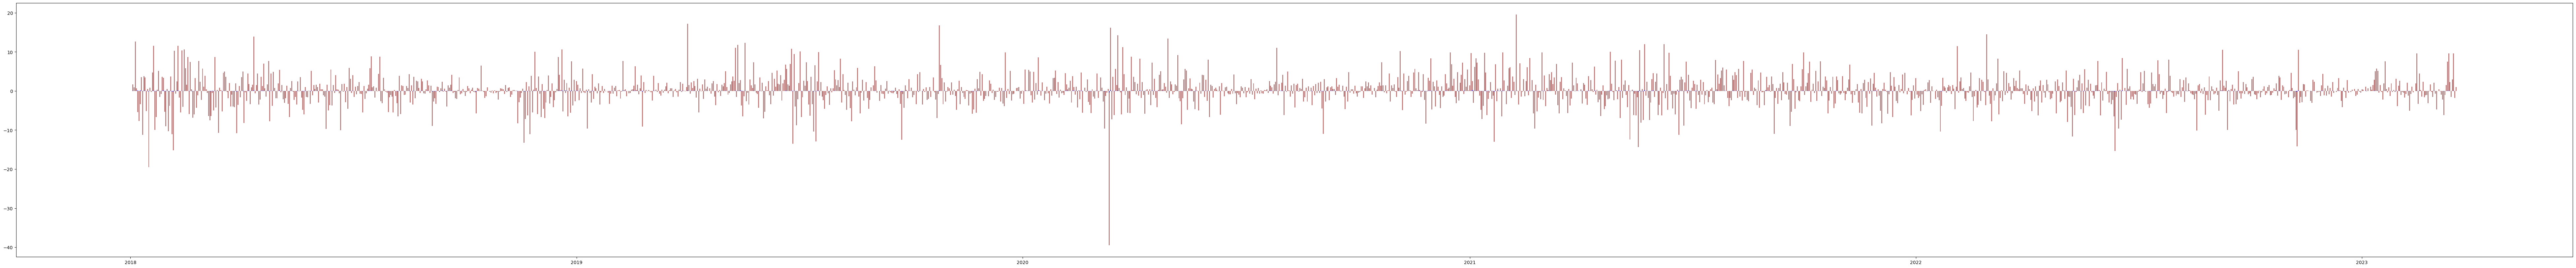

In [13]:
#Return bar chart
fig = plt.figure(figsize =(100, 10))
plt.bar(df_btc.index,df_btc['return'], color ='maroon',width = 0.8,alpha=0.5)
plt.bar(df_btc.index,df_eth['return'], color ='blue',width = 0.8,alpha=0.5)

plt.show()


<AxesSubplot:>

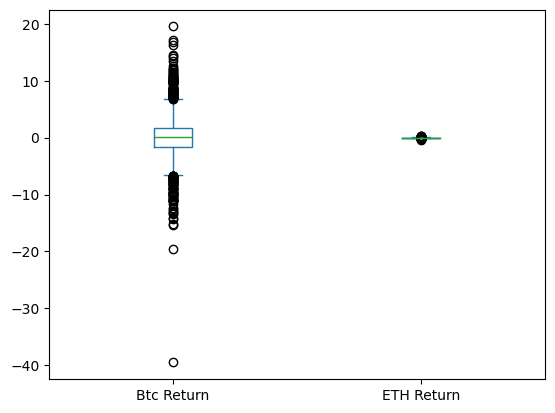

In [14]:
box_df = pd.concat([df_btc["return"], df_eth["return"]],axis = 1)
box_df.columns = ["Btc Return", "ETH Return"]
box_df.plot(kind='box')

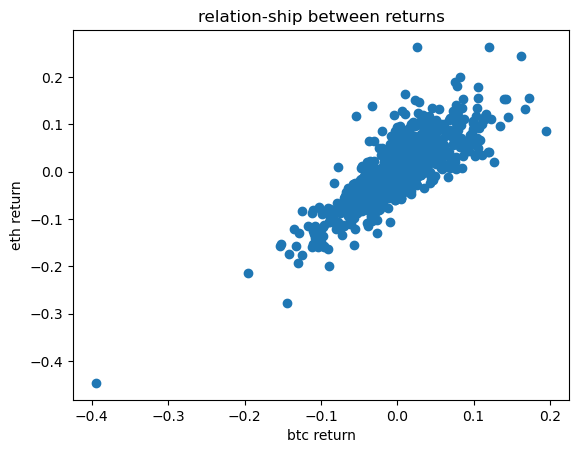

In [107]:
plt.scatter(df_btc["return"], df_eth['return'])
plt.title("relation-ship between returns")
plt.xlabel("btc return")
plt.ylabel("eth return")
plt.show()

In [113]:
coefficient = df_btc["return"].corr(df_eth['return'])
coefficient

0.8216699694431003

In [111]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_btc["return"], df_eth['return'])

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)
print("R value:", r_value)
print("P value:", p_value)
print("Standard error:", std_err)

Slope: nan
Intercept: nan
R value: nan
P value: nan
Standard error: nan


In [17]:
subset = df_btc.loc['2022-01-01':'2022-12-31']


<AxesSubplot:xlabel='date'>

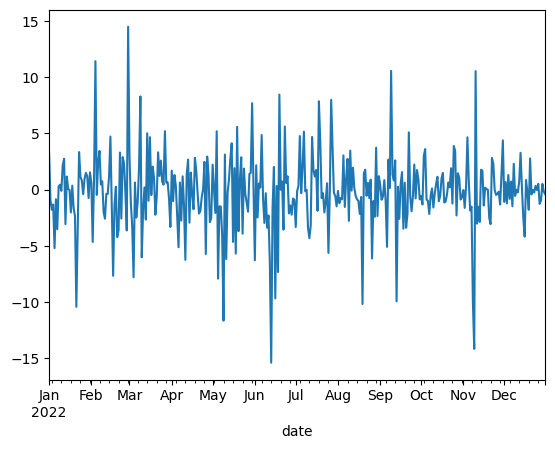

In [18]:
subset['return'].plot()

<AxesSubplot:xlabel='date'>

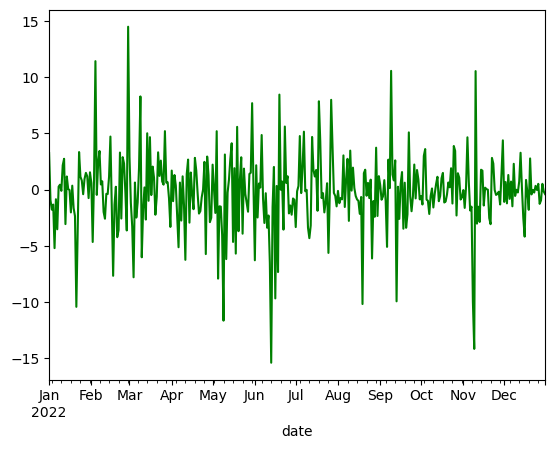

In [19]:
# fig = plt.figure(figsize =(500, 10))

subset['return'].plot(color=(subset['return'] > 0).map({True: 'g',False: 'r'}))

In [25]:
df_2022 = df_btc[df_btc.index.year == 2022]

In [28]:
df_2022_1 = df_2022[df_2022.index.month == 1]

<AxesSubplot:xlabel='date'>

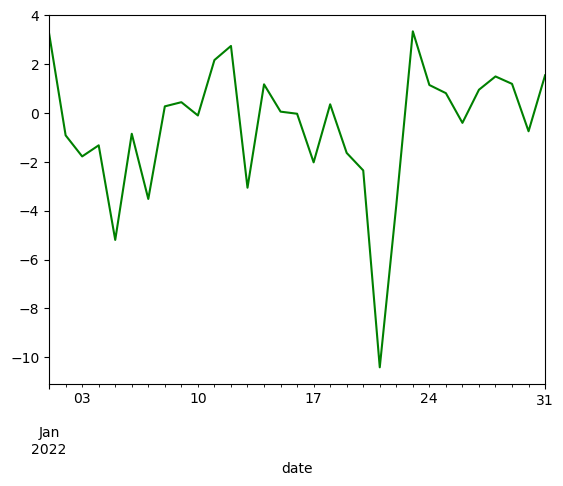

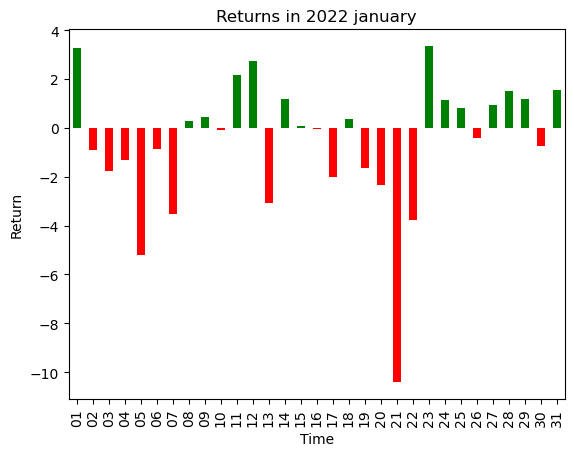

In [43]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bar chart with different colors for positive and negative values
df_2022_1['return'].plot.bar(ax=ax, color=(df_2022_1['return'] > 0).map({True: 'g',False: 'r'}))

# Set the title and axis labels
ax.set_title('Returns in 2022 january')
ax.set_xlabel('Time')
ax.set_ylabel('Return')

# Format the x-axis labels to show only the date (without the time)
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()

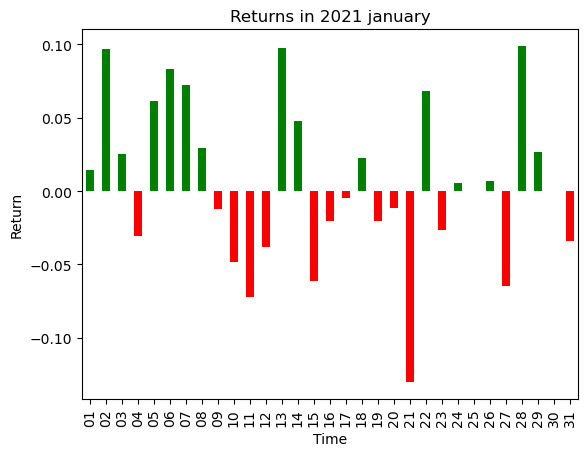

In [96]:
df_2020 = df_btc[df_btc.index.year == 2021]
df_2020_1 = df_2020[df_2020.index.month == 1]
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bar chart with different colors for positive and negative values
df_2020_1['return'].plot.bar(ax=ax, color=(df_2020_1['return'] > 0).map({True: 'g',False: 'r'}))

# Set the title and axis labels
ax.set_title('Returns in 2021 january')
ax.set_xlabel('Time')
ax.set_ylabel('Return')

# Format the x-axis labels to show only the date (without the time)
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()

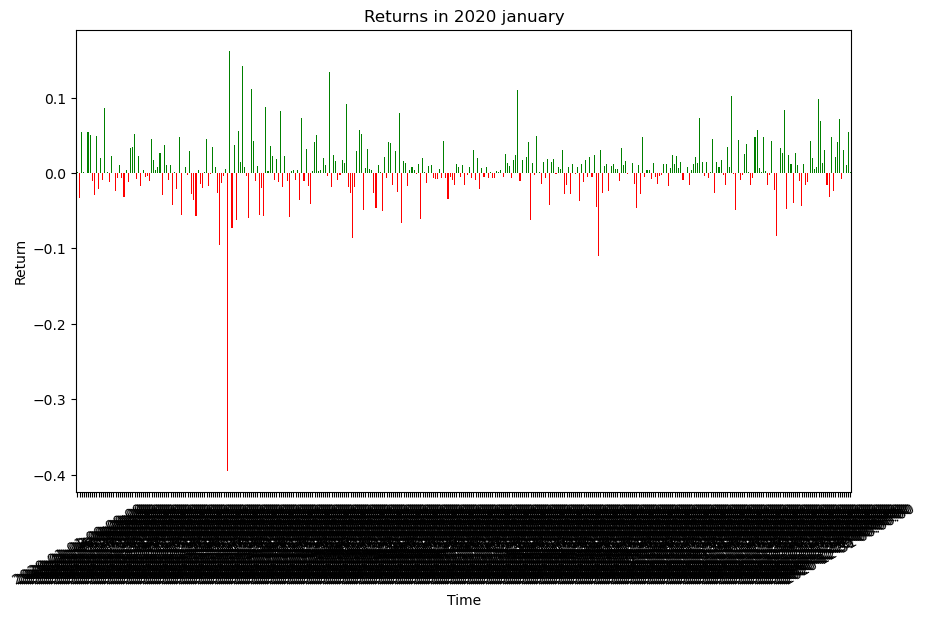

In [104]:
df_2020 = df_btc[df_btc.index.year == 2020]
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the bar chart with different colors for positive and negative values
df_2020['return'].plot.bar(ax=ax, color=(df_2020['return'] > 0).map({True: 'g',False: 'r'}))

# Set the title and axis labels
ax.set_title('Returns in 2020 january')
ax.set_xlabel('Time')
ax.set_ylabel('Return')

# Format the x-axis labels to show only the date (without the time)
plt.setp(ax.get_xticklabels(), rotation=30, fontsize=10)

# Display the plot
plt.show()

AttributeError: 'list' object has no attribute 'set_rotation'

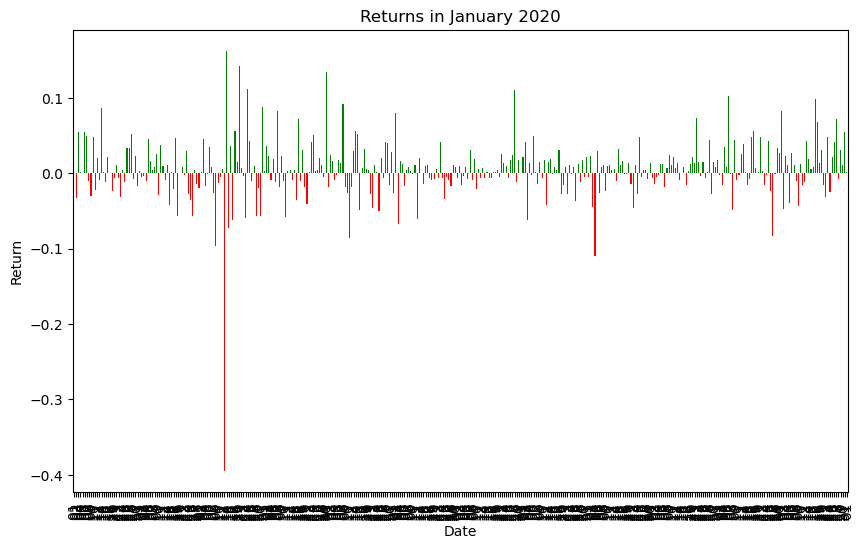

In [106]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Subset the Bitcoin data frame for the year 2020
df_2020 = df_btc[df_btc.index.year == 2020]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the bar chart with different colors for positive and negative values
df_2020['return'].plot.bar(ax=ax, color=(df_2020['return'] > 0).map({True: 'g',False: 'r'}))

# Set the title and axis labels
ax.set_title('Returns in January 2020')
ax.set_xlabel('Date')
ax.set_ylabel('Return')

# Format the x-axis labels to show only the day of the month (without the time)
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

# Rotate the x-axis labels for better readability
ax.xaxis.get_ticklabels()[::2].set_rotation(45)

# Display the plot
plt.show()


In [61]:
df_btc_1w

,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume,return
date,,,,,,,,
2018-01-08,16218.85,16322.30,11400.00,13474.99,1.375379e+05,1176645,6.752953e+04,NaN
2018-01-15,13477.98,14249.99,9035.00,11530.00,3.031275e+05,2359135,1.488470e+05,-0.144341
2018-01-22,11530.00,12244.00,9900.24,11879.95,1.980301e+05,1961464,9.521966e+04,0.030351
2018-01-29,11879.95,11975.02,7930.00,8184.81,2.020164e+05,2082917,9.271882e+04,-0.311040
2018-02-05,8179.99,9065.78,6000.01,8063.88,3.407943e+05,3182111,1.684426e+05,-0.014775
...,...,...,...,...,...,...,...,...
2023-02-13,21782.37,25250.00,21351.07,24271.76,2.497565e+06,58393471,1.250658e+06,0.114225
2023-02-20,24272.51,25250.00,22722.00,23554.85,2.237984e+06,73475940,1.113474e+06,-0.029537
2023-02-27,23554.85,24000.00,21971.13,22430.24,1.698503e+06,55369117,8.443098e+05,-0.047744


/var/folders/l8/wvmkld_n55xc9w_c94f4zj8c0000gn/T/ipykernel_92141/3171577731.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(weeks)


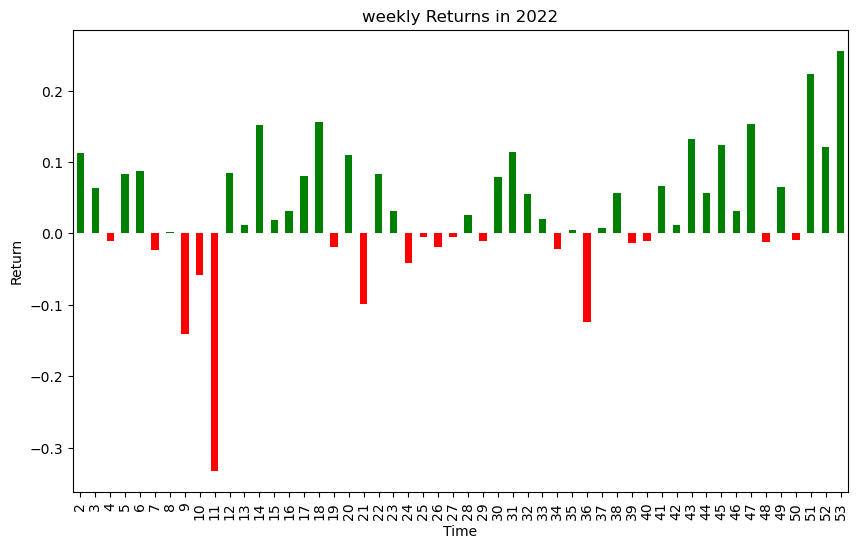

In [86]:
import matplotlib.ticker as ticker

df_2021_1w = df_btc_1w[df_btc_1w.index.year == 2020]
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the bar chart with different colors for positive and negative values
df_2021_1w['return'].plot.bar(ax=ax, color=(df_2021_1w['return'] > 0).map({True: 'g',False: 'r'}))

# Set the title and axis labels
ax.set_title('weekly Returns in 2022')
ax.set_xlabel('Time')
ax.set_ylabel('Return')

# Format the x-axis labels to show the week number
# ax.tick_params(axis='x', labelbottom=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
weeks = [str(i) for i in range(1, 54)]

ax.set_xticklabels(weeks)


# Display the plot
plt.show()